In [1]:
import pathlib
import PIL
from PIL import Image
import os.path
import glob

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras


2025-07-04 11:31:21.701420: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-04 11:31:22.202703: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751621482.424645   18393 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751621482.500003   18393 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751621483.088044   18393 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
new_model = tf.keras.models.load_model('model/RNN_batchsize512_32x32_full_dataset.keras')

new_model.summary()

2025-07-04 11:31:55.755342: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 27)             │         3,483 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 474,803 (1.81 MB)

 Trainable params: 158,267 (618.23 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 316,536 (1.21 MB)

In [3]:
data_dir = "../../data/peinture_art/"
data_dir = pathlib.Path(data_dir).with_suffix('')

batch_size = 32
img_height = 32
img_width = 32

In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_ds.class_names

Found 80780 files belonging to 27 classes.
Using 16156 files for validation.


In [6]:
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

2025-06-30 17:13:41.911281: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


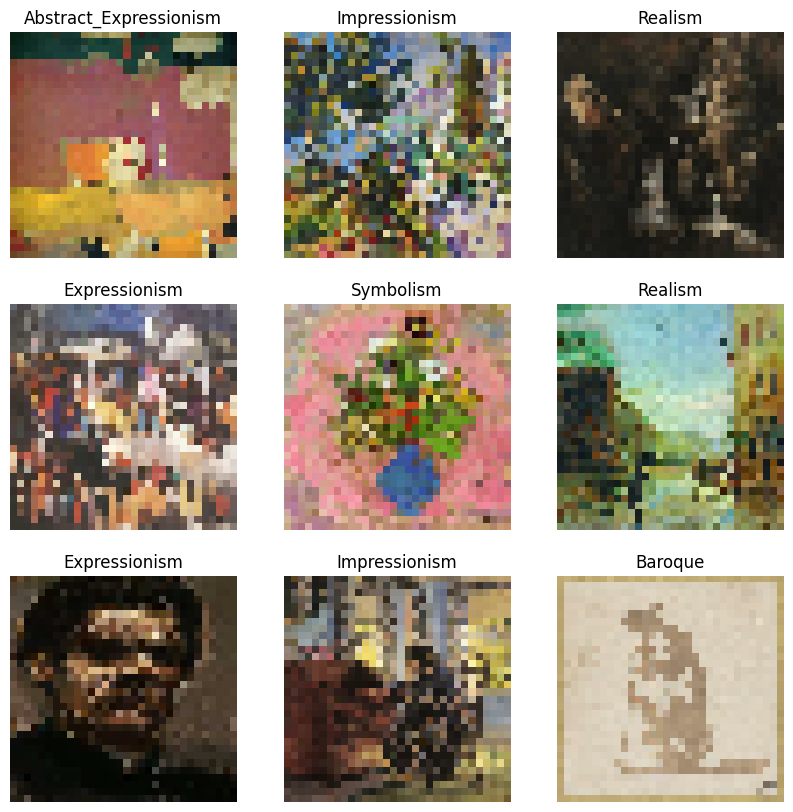

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

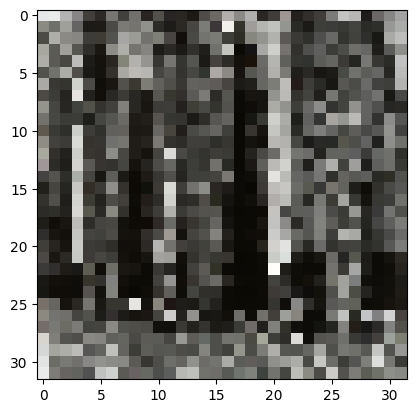

In [4]:
new_img_url = '../../data/peinture_art/Abstract_Expressionism/aaron-siskind_acolman-1-1955.jpg'
new_img = tf.keras.utils.load_img(new_img_url, target_size=(img_height, img_width))

plt.imshow(new_img)
img_array = tf.keras.utils.img_to_array(new_img)
img_array = tf.expand_dims(img_array, 0)

In [25]:
predictions = new_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(class_names[np.argmax(predictions[0])])
predictions[0]


np.argmax(predictions[0])

indice_top3 = np.flip(np.argsort(predictions[0]))[:3].tolist()
class_top3 = [class_names[i] for i in np.flip(np.argsort(predictions[0]))[:3]]
class_top3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Realism


['Realism', 'Northern_Renaissance', 'Impressionism']